In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Normalization
from keras.activations import sigmoid as gi
from Supervise_ML import load_coffee_data
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [4]:
X,y = load_coffee_data()
X

array([[185.31763812,  12.69396457],
       [259.92047498,  11.86766377],
       [231.01357101,  14.41424211],
       [175.3666449 ,  11.72058651],
       [187.12086467,  14.12973206],
       [225.90586448,  12.10024905],
       [208.40515676,  14.17718919],
       [207.07593089,  14.0327376 ],
       [280.60385359,  14.23225929],
       [202.86935247,  12.24901028],
       [196.70468985,  13.54426389],
       [270.31327028,  14.60225577],
       [192.94979108,  15.19686759],
       [213.57283453,  14.27503537],
       [164.47298664,  11.91817423],
       [177.25750542,  15.03779869],
       [241.7745473 ,  14.89694529],
       [236.99889634,  13.12616959],
       [219.73805621,  13.87377407],
       [266.38592796,  13.25274466],
       [270.45241485,  13.95486775],
       [261.96307698,  13.49222422],
       [243.4899478 ,  12.8561015 ],
       [220.58184803,  12.36489356],
       [163.59498627,  11.65441652],
       [244.76317931,  13.32572248],
       [271.19410986,  14.84073282],
 

In [5]:
y

array([[1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],

In [93]:
norm_1 = Normalization(axis=-1)
norm_1.adapt(X)
Xn = norm_1(X)
Xn

<tf.Tensor: shape=(200, 2), dtype=float32, numpy=
array([[-0.8345551 , -0.6528792 ],
       [ 1.0323051 , -1.3851453 ],
       [ 0.3089391 ,  0.8716251 ],
       [-1.0835688 , -1.5154841 ],
       [-0.7894313 ,  0.6194935 ],
       [ 0.18112417, -1.1790283 ],
       [-0.25681356,  0.6615495 ],
       [-0.29007602,  0.5335373 ],
       [ 1.5498857 ,  0.7103532 ],
       [-0.39534125, -1.047197  ],
       [-0.54960555,  0.1006532 ],
       [ 1.2923743 ,  1.0382426 ],
       [-0.6435681 ,  1.5651861 ],
       [-0.12749763,  0.7482604 ],
       [-1.3561714 , -1.340383  ],
       [-1.0362518 ,  1.4242196 ],
       [ 0.57822186,  1.2993953 ],
       [ 0.45871606, -0.26986104],
       [ 0.02678081,  0.3926646 ],
       [ 1.1940966 , -0.15769024],
       [ 1.2958566 ,  0.46452886],
       [ 1.0834192 ,  0.05453626],
       [ 0.6211478 , -0.5091947 ],
       [ 0.04789595, -0.94450104],
       [-1.3781425 , -1.5741245 ],
       [ 0.65300936, -0.09301733],
       [ 1.3144168 ,  1.24958   ],
     

In [13]:
df = pd.DataFrame(X)
df

,0,1
0,185.317638,12.693965
1,259.920475,11.867664
2,231.013571,14.414242
3,175.366645,11.720587
4,187.120865,14.129732
...,...,...
195,223.781833,15.299167
196,266.627673,12.480510
197,273.683982,13.097562
198,220.610006,12.799891


In [16]:
df[2] = y
df

,0,1,2
0,185.317638,12.693965,1.0
1,259.920475,11.867664,0.0
2,231.013571,14.414242,0.0
3,175.366645,11.720587,0.0
4,187.120865,14.129732,1.0
...,...,...,...
195,223.781833,15.299167,0.0
196,266.627673,12.480510,0.0
197,273.683982,13.097562,0.0
198,220.610006,12.799891,1.0


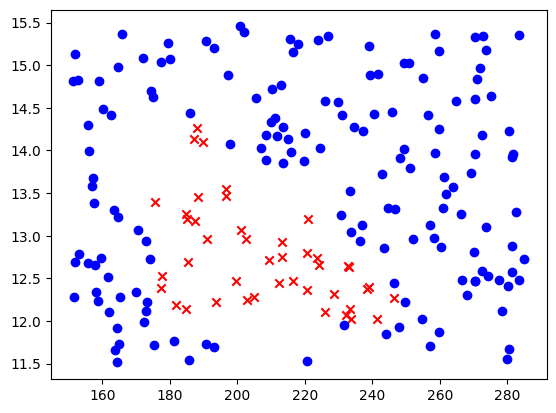

In [18]:
good = df[df[2] == 1.0]
bad = df[df[2] == 0.0]
plt.scatter(good[0],good[1],marker='x',c='r')
plt.scatter(bad[0],bad[1],marker='o',c='b')

In [101]:
def dense(X,W,b):
    units = W.shape[1]
    p = np.zeros(units)
    for j in range(units):
        w = W[:,j]
        z = np.dot(w,X) + b[j]
        p[j] = gi(z)
    return p

In [102]:
def sequential(X,W1,b1,W2,b2):
    a1 = dense(X,W1,b1)
    a2 = dense(a1,W2,b2)
    return a2

In [103]:
W1_tmp = np.array([[-8.93, 0.29, 12.9], [-0.1, -7.32, 10.81]])
b1_tmp = np.array([-9.82, -9.28, 0.96])
W2_tmp = np.array([[-31.18], [-27.59], [-32.56]])
b2_tmp = np.array([15.41])

In [112]:
def predict_neural(X, W1, b1, W2, b2):
    m = X.shape[0]
    p = np.zeros(m)
    for i in range(m):
        p[i] = sequential(X[i], W1, b1, W2, b2)
    return(p)

In [113]:
X_tst = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example
X_tsn = norm_1(X_tst)  # remember to normalize
pred = predict_neural(X_tsn,W1_tmp,b1_tmp,W2_tmp,b2_tmp)

In [114]:
y_hat = (pred >= 0.5).astype(int)
y_hat

array([1, 0])